# Capstone 2 - Step 2: Data Wrangling


I originally intended to source data from Zillow but discovered that the data available for download was very minimal.  I found an alternative source on the Denver City and County Open Data site.

## Data Collection

In [1]:
#load python packages
import os
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 500)

**<font color='teal'> Print the current working directory </font>**

In [3]:
print(os.getcwd())

C:\Users\Nancy\Documents\GitHub\Springboard\Capstone 2 Denver Real Estate


In [4]:
print(os.listdir(os.curdir))

['.ipynb_checkpoints', 'Capstone 2 - Step 2 Data Wrangling.ipynb', 'Capstone 2 - Step 3 Exploratory Data Analysis.ipynb', 'data', 'figures', 'models']


### Load the sales data from the csv file
The sales file is on the Denver Open Data Catalog


In [5]:
url="https://www.denvergov.org/media/gis/DataCatalog/real_property_sales_and_transfers/csv/real_property_sales_and_transfers.csv"
df_sales = pd.read_csv(url,encoding='latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Check on what has been loaded for Sales
The file contains all sales and transfers for many real estate categories

In [6]:
print(df_sales.groupby(['D_CLASS_CN']).size())

D_CLASS_CN
101 CONDO PKG                      5521
10S CONDO STORAGE                   218
ANIMAL GROOMING-SMALL                 4
APARTMENT UNIT W/COMM                47
APT HIGH-RISE>9 UNT,10+ST            18
APT LOW-RISE>9UNT, WALK-UP         1311
APT MID-RISE>9 UNT,1-9STY           173
APT MISC, PKG, CLUBHOUSES           113
APT W/2 UNITS                      3539
APT W/3 UNITS                       613
APT W/4 UNITS                       970
APT W/5 UNITS                        98
APT W/6 UNITS                       196
APT W/7 UNITS                        69
APT W/8 UNITS                        92
AUTO DEAL SALES OFC ONLY             28
AUTO DEAL W/OTHER USE                11
AUTO DEALER CONV FROM RES             3
AUTO DEALER LARGE                    16
AUTO DEALER MED SHOWROOM             12
AUTO DEARLER CONV FROM SS            15
AUTO SERVICE                        317
AUTO SVC. W/RES                       7
AUTO/TRUCK TERMINAL 1 STORY           6
AUTO/TRUCK TERMINAL 2 STORY  

### subset the sales file
only retain the single family sales types that show a nonzero sales price

In [7]:
df_sfr = df_sales.loc[(df_sales['D_CLASS_CN'] == 'SINGLE FAMILY')&(df_sales['SALE_PRICE']>0)]
print(df_sfr.describe())

           SCHEDNUM      SALE_YEAR  SALE_MONTHDAY  RECEPTION_DATE  \
count  1.483460e+05  148346.000000   148346.00000    1.483460e+05   
mean   3.586659e+11    2014.107802      673.94225    2.014210e+07   
std    2.337940e+11       3.487885      330.68469    3.488450e+04   
min    1.410100e+10    2008.000000      101.00000    1.969123e+07   
25%    1.304160e+11    2011.000000      412.00000    2.011110e+07   
50%    5.015210e+11    2014.000000      630.00000    2.014122e+07   
75%    5.265120e+11    2017.000000      928.00000    2.017072e+07   
max    9.145050e+11    2020.000000     1231.00000    2.020052e+07   

         SALE_PRICE       MKT_CLUS         NBHD_1           PIN  
count  1.483460e+05  148344.000000  148346.000000  1.483460e+05  
mean   4.553823e+05      16.347321     366.021079  1.617337e+08  
std    1.315103e+06       9.698378     247.382400  1.046588e+06  
min    1.000000e+00       1.000000       1.000000  1.604339e+08  
25%    9.100000e+04       7.000000     127.00000

### Load the characteristics data from the csv file
The residential characteristics file is on the Denver Open Data Catalog


In [8]:
url="https://www.denvergov.org/media/gis/DataCatalog/real_property_residential_characteristics/csv/real_property_residential_characteristics.csv"
df_char = pd.read_csv(url,encoding='latin1')
print(df_char.describe())

                PIN      SCHEDNUM        CD         OFCARD       SITE_NBR  \
count  2.092050e+05  2.092050e+05  209205.0  209205.000000  209205.000000   
mean   1.620467e+08  4.067886e+11       1.0       1.005177    3606.450639   
std    1.103371e+06  2.278001e+11       0.0       0.194022    3790.424715   
min    1.600890e+08  4.100122e+09       1.0       1.000000       1.000000   
25%    1.611652e+08  2.231011e+11       1.0       1.000000    1250.000000   
50%    1.618121e+08  5.066030e+11       1.0       1.000000    2660.000000   
75%    1.629696e+08  5.361190e+11       1.0       1.000000    4577.000000   
max    1.643607e+08  1.223100e+12       1.0      35.000000   26100.000000   

          PROP_CLASS     LAND_SQFT       AREA_ABG      BSMT_AREA  \
count  209205.000000  2.085220e+05  209205.000000  209205.000000   
mean     1253.925542  5.398927e+03    1367.792084     494.626940   
std      1081.818380  1.420498e+04     795.242857     557.700834   
min       100.000000  0.000000e+00

### Merge the characteristics into the sales 
Get the characteristics for each home that was sold from the characteristics file

In [9]:
df = pd.merge(df_sfr, df_char, how='inner', on='PIN')

In [10]:
df.head()

,SCHEDNUM_x,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y,NBHD_1_CN_y,LEGL_DESCRIPTION
0,14101001000,2008138043,WD,2008,703,20081008,10.0,"ATKINSON,RUSSELL",DREAM BUILDERS LLC,R,...,1,103000,530200,7365,37910,37920,0,5,N GREEN VALLEY,GREEN VALLEY RANCH FLG #36 B1 L1
1,14101001000,2009074518,WD,2009,605,20090615,299000.0,"ATKINSON,RUSSELL","PADBURY,CHRISTOPHER R",R,...,1,103000,530200,7365,37910,37920,0,5,N GREEN VALLEY,GREEN VALLEY RANCH FLG #36 B1 L1
2,14101001000,2015157653,WD,2015,1102,20151109,415000.0,"PADBURY,CHRISTOPHER R","MACIEL,HORACIO PEREZ",R,...,1,103000,530200,7365,37910,37920,0,5,N GREEN VALLEY,GREEN VALLEY RANCH FLG #36 B1 L1
3,14101001000,2009002129,WD,2008,1024,20090108,10.0,DREAM BUILDERS LLC,"ATKINSON,RUSSELL",R,...,1,103000,530200,7365,37910,37920,0,5,N GREEN VALLEY,GREEN VALLEY RANCH FLG #36 B1 L1
4,14101002000,2010094573,WD,2010,823,20100824,350000.0,"SHEARON,MARK H &","EFREM,TEWEDROS",R,...,1,90400,572600,6464,40941,40940,0,5,N GREEN VALLEY,GREEN VALLEY RANCH FLG #36 B1 L2


In [11]:
df.describe()

,SCHEDNUM_x,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1_x,PIN,SCHEDNUM_y,CD,...,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y
count,1.483390e+05,148339.000000,148339.000000,1.483390e+05,1.483390e+05,148337.000000,148339.000000,1.483390e+05,1.483390e+05,148339.0,...,148335.000000,148335.000000,148339.000000,1.483390e+05,1.483390e+05,148339.000000,1.483390e+05,1.483390e+05,148339.000000,148339.000000
mean,3.586757e+11,2014.107740,673.952049,2.014210e+07,4.553894e+05,16.347553,366.031590,1.617337e+08,3.586757e+11,1.0,...,1958.258638,1104.423669,1.027700,2.292586e+05,5.706441e+05,16392.924430,4.080276e+04,4.078173e+04,22.026203,366.031590
std,2.337924e+11,3.487877,330.681631,3.488442e+04,1.315131e+06,9.698299,247.380565,1.046570e+06,2.337924e+11,0.0,...,37.236505,1000.256335,0.287149,1.952512e+05,3.913446e+05,13962.982525,2.798466e+04,2.799077e+04,1184.461870,247.380565
min,1.410100e+10,2008.000000,101.000000,1.969123e+07,1.000000e+00,1.000000,1.000000,1.604339e+08,1.410100e+10,1.0,...,1873.000000,0.000000,0.000000,0.000000e+00,4.400000e+04,0.000000,3.146000e+03,0.000000e+00,0.000000,1.000000
25%,1.304160e+11,2011.000000,412.000000,2.011110e+07,9.100000e+04,7.000000,127.000000,1.608885e+08,1.304160e+11,1.0,...,1930.000000,0.000000,1.000000,9.070000e+04,3.479000e+05,6485.000000,2.487500e+04,2.486000e+04,0.000000,127.000000
50%,5.015210e+11,2014.000000,630.000000,2.014122e+07,2.750000e+05,16.000000,509.000000,1.614992e+08,5.015210e+11,1.0,...,1954.000000,2001.000000,1.000000,1.682000e+05,4.593000e+05,12026.000000,3.284000e+04,3.283000e+04,0.000000,509.000000
75%,5.265120e+11,2017.000000,928.000000,2.017072e+07,4.500000e+05,24.000000,580.000000,1.621060e+08,5.265120e+11,1.0,...,1997.000000,2013.000000,1.000000,3.181000e+05,6.455000e+05,22751.000000,4.616000e+04,4.614000e+04,0.000000,580.000000
max,9.145050e+11,2020.000000,1231.000000,2.020052e+07,4.950000e+07,54.000000,906.000000,1.643503e+08,9.145050e+11,1.0,...,2019.000000,3000.000000,13.000000,7.750000e+06,1.464040e+07,554125.000000,1.046789e+06,1.046790e+06,161740.000000,906.000000


## Data Organization

In [12]:
path = os.getcwd()

In [13]:
print ("The current working directory is %s" % path)

The current working directory is C:\Users\Nancy\Documents\GitHub\Springboard\Capstone 2 Denver Real Estate


### Create subfolders in your project directory

This is actually a one time process to set up the storage files for this project.

Now, create some subfolders inside your project folder.

<font color='teal'> **Create a subfolder called `data`.**</font>

In [14]:
#os.mkdir('data')


<font color='teal'> **Create a folder for the data visualizations you will create in future steps called `figures`.**</font>

In [15]:
#os.mkdir('figures')

<font color='teal'> **Create a folder for the models you save, called `models`.**</font>

In [16]:
#os.mkdir('models')

<font color='teal'> **Print the contents of your project folder to confirm you created the additional folders in your directory.**</font>

In [17]:
#os.listdir(os.curdir)

## Data Definition
In this step review column names, data types, and null values.

### Column Names 
<font color='teal'> **Print the columns names of the entire dataframe**</font>

In [18]:
print(df.columns)

Index(['SCHEDNUM_x', 'RECEPTION_NUM', 'INSTRUMENT', 'SALE_YEAR',
       'SALE_MONTHDAY', 'RECEPTION_DATE', 'SALE_PRICE', 'GRANTOR', 'GRANTEE',
       'CLASS', 'MKT_CLUS', 'D_CLASS', 'D_CLASS_CN_x', 'NBHD_1_x',
       'NBHD_1_CN_x', 'PIN', 'SCHEDNUM_y', 'CD', 'OFCARD', 'OWNER', 'CO_OWNER',
       'OWNER_NUM', 'OWNER_DIR', 'OWNER_ST', 'OWNER_TYPE', 'OWNER_APT',
       'OWNER_CITY', 'OWNER_STATE', 'OWNER_ZIP', 'SITE_NBR', 'SITE_DIR',
       'SITE_NAME', 'SITE_MODE', 'SITE_MORE', 'TAX_DIST', 'PROP_CLASS',
       'PROPERTY_CLASS', 'ZONE10', 'D_CLASS_CN_y', 'LAND_SQFT', 'AREA_ABG',
       'BSMT_AREA', 'FBSMT_SQFT', 'GRD_AREA', 'STORY', 'STYLE_CN', 'BED_RMS',
       'FULL_B', 'HLF_B', 'CCYRBLT', 'CCAGE_RM', 'UNITS', 'ASMT_APPR_LAND',
       'TOTAL_VALUE', 'ASDLAND', 'ASSESS_VALUE', 'ASMT_TAXABLE',
       'ASMT_EXEMPT_AMT', 'NBHD_1_y', 'NBHD_1_CN_y', 'LEGL_DESCRIPTION'],
      dtype='object')


### Data Types 
Review which columns are integer, float, categorical, or dates. Make sure the data type is loaded properly in the dataframe. 

In [19]:
print(df.dtypes)

SCHEDNUM_x            int64
RECEPTION_NUM        object
INSTRUMENT           object
SALE_YEAR             int64
SALE_MONTHDAY         int64
RECEPTION_DATE        int64
SALE_PRICE          float64
GRANTOR              object
GRANTEE              object
CLASS                object
MKT_CLUS            float64
D_CLASS              object
D_CLASS_CN_x         object
NBHD_1_x              int64
NBHD_1_CN_x          object
PIN                   int64
SCHEDNUM_y            int64
CD                    int64
OFCARD                int64
OWNER                object
CO_OWNER             object
OWNER_NUM            object
OWNER_DIR            object
OWNER_ST             object
OWNER_TYPE           object
OWNER_APT            object
OWNER_CITY           object
OWNER_STATE          object
OWNER_ZIP            object
SITE_NBR              int64
SITE_DIR             object
SITE_NAME            object
SITE_MODE            object
SITE_MORE            object
TAX_DIST             object
PROP_CLASS          

<font color='teal'> **The `df.info()` function also prints the count of non-null values per column. Use this function to review the column names, null value counts and data types of your data frame.**</font>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148339 entries, 0 to 148338
Data columns (total 61 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SCHEDNUM_x        148339 non-null  int64  
 1   RECEPTION_NUM     148339 non-null  object 
 2   INSTRUMENT        148339 non-null  object 
 3   SALE_YEAR         148339 non-null  int64  
 4   SALE_MONTHDAY     148339 non-null  int64  
 5   RECEPTION_DATE    148339 non-null  int64  
 6   SALE_PRICE        148339 non-null  float64
 7   GRANTOR           148339 non-null  object 
 8   GRANTEE           148339 non-null  object 
 9   CLASS             148339 non-null  object 
 10  MKT_CLUS          148337 non-null  float64
 11  D_CLASS           148339 non-null  object 
 12  D_CLASS_CN_x      148339 non-null  object 
 13  NBHD_1_x          148339 non-null  int64  
 14  NBHD_1_CN_x       148339 non-null  object 
 15  PIN               148339 non-null  int64  
 16  SCHEDNUM_y        14

### Denver provides metadata for both files

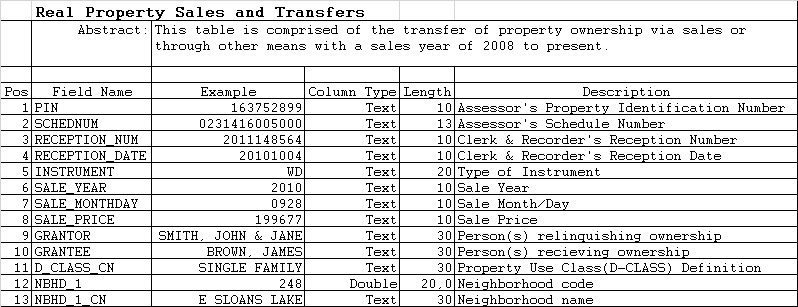



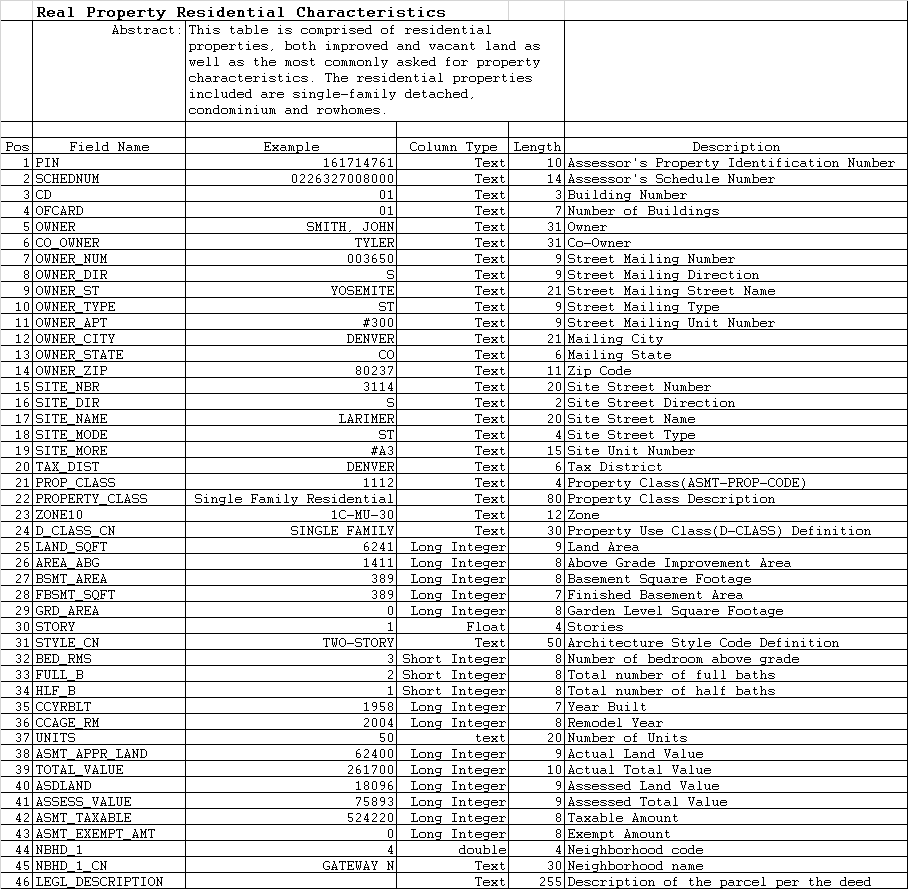

### Count of unique values or codes
<font color='teal'> **Print the count of unique values for every column, regardless of data type.**</font>

In [21]:
for col in df.columns: print(col, df[col].nunique())

SCHEDNUM_x 78559
RECEPTION_NUM 142343
INSTRUMENT 28
SALE_YEAR 13
SALE_MONTHDAY 366
RECEPTION_DATE 3113
SALE_PRICE 16610
GRANTOR 105237
GRANTEE 116440
CLASS 2
MKT_CLUS 35
D_CLASS 8
D_CLASS_CN_x 1
NBHD_1_x 263
NBHD_1_CN_x 159
PIN 78559
SCHEDNUM_y 78559
CD 1
OFCARD 5
OWNER 74264
CO_OWNER 438
OWNER_NUM 12548
OWNER_DIR 10
OWNER_ST 3698
OWNER_TYPE 52
OWNER_APT 744
OWNER_CITY 937
OWNER_STATE 53
OWNER_ZIP 25523
SITE_NBR 11775
SITE_DIR 4
SITE_NAME 719
SITE_MODE 11
SITE_MORE 338
TAX_DIST 27
PROP_CLASS 9
PROPERTY_CLASS 8
ZONE10 99
D_CLASS_CN_y 1
LAND_SQFT 6417
AREA_ABG 4378
BSMT_AREA 2628
FBSMT_SQFT 2190
GRD_AREA 821
STORY 4
STYLE_CN 11
BED_RMS 15
FULL_B 10
HLF_B 7
CCYRBLT 147
CCAGE_RM 103
UNITS 13
ASMT_APPR_LAND 6440
TOTAL_VALUE 12671
ASDLAND 6441
ASSESS_VALUE 18227
ASMT_TAXABLE 10213
ASMT_EXEMPT_AMT 37
NBHD_1_y 263
NBHD_1_CN_y 159
LEGL_DESCRIPTION 78554


<font color='teal'> **Print the percent of unique values per column. Use the `df.nunique` and the size of the dataframe to calculate the percentages.**</font>

In [22]:
for col in df.columns: print(col, 100*df[col].nunique()/df.shape[0])

SCHEDNUM_x 52.959100438859636
RECEPTION_NUM 95.95790722601609
INSTRUMENT 0.018875683400858843
SALE_YEAR 0.008763710150398748
SALE_MONTHDAY 0.2467321473112263
RECEPTION_DATE 2.098571515245485
SALE_PRICE 11.197325046009478
GRANTOR 70.94358193057793
GRANTEE 78.49587768557156
CLASS 0.0013482631000613459
MKT_CLUS 0.023594604251073556
D_CLASS 0.0053930524002453835
D_CLASS_CN_x 0.0006741315500306729
NBHD_1_x 0.177296597658067
NBHD_1_CN_x 0.107186916454877
PIN 52.959100438859636
SCHEDNUM_y 52.959100438859636
CD 0.0006741315500306729
OFCARD 0.0033706577501533648
OWNER 50.0637054314779
CO_OWNER 0.2952696189134348
OWNER_NUM 8.459002689784885
OWNER_DIR 0.0067413155003067295
OWNER_ST 2.492938472013429
OWNER_TYPE 0.03505484060159499
OWNER_APT 0.5015538732228207
OWNER_CITY 0.6316612623787405
OWNER_STATE 0.03572897215162567
OWNER_ZIP 17.205859551432866
SITE_NBR 7.937899001611174
SITE_DIR 0.0026965262001226917
SITE_NAME 0.4847005844720539
SITE_MODE 0.007415447050337403
SITE_MORE 0.22785646391036746
TAX

<font color='teal'> **Review the numeric dataset's summary statistics.**</font>

In [23]:
df.describe()

,SCHEDNUM_x,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1_x,PIN,SCHEDNUM_y,CD,...,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y
count,1.483390e+05,148339.000000,148339.000000,1.483390e+05,1.483390e+05,148337.000000,148339.000000,1.483390e+05,1.483390e+05,148339.0,...,148335.000000,148335.000000,148339.000000,1.483390e+05,1.483390e+05,148339.000000,1.483390e+05,1.483390e+05,148339.000000,148339.000000
mean,3.586757e+11,2014.107740,673.952049,2.014210e+07,4.553894e+05,16.347553,366.031590,1.617337e+08,3.586757e+11,1.0,...,1958.258638,1104.423669,1.027700,2.292586e+05,5.706441e+05,16392.924430,4.080276e+04,4.078173e+04,22.026203,366.031590
std,2.337924e+11,3.487877,330.681631,3.488442e+04,1.315131e+06,9.698299,247.380565,1.046570e+06,2.337924e+11,0.0,...,37.236505,1000.256335,0.287149,1.952512e+05,3.913446e+05,13962.982525,2.798466e+04,2.799077e+04,1184.461870,247.380565
min,1.410100e+10,2008.000000,101.000000,1.969123e+07,1.000000e+00,1.000000,1.000000,1.604339e+08,1.410100e+10,1.0,...,1873.000000,0.000000,0.000000,0.000000e+00,4.400000e+04,0.000000,3.146000e+03,0.000000e+00,0.000000,1.000000
25%,1.304160e+11,2011.000000,412.000000,2.011110e+07,9.100000e+04,7.000000,127.000000,1.608885e+08,1.304160e+11,1.0,...,1930.000000,0.000000,1.000000,9.070000e+04,3.479000e+05,6485.000000,2.487500e+04,2.486000e+04,0.000000,127.000000
50%,5.015210e+11,2014.000000,630.000000,2.014122e+07,2.750000e+05,16.000000,509.000000,1.614992e+08,5.015210e+11,1.0,...,1954.000000,2001.000000,1.000000,1.682000e+05,4.593000e+05,12026.000000,3.284000e+04,3.283000e+04,0.000000,509.000000
75%,5.265120e+11,2017.000000,928.000000,2.017072e+07,4.500000e+05,24.000000,580.000000,1.621060e+08,5.265120e+11,1.0,...,1997.000000,2013.000000,1.000000,3.181000e+05,6.455000e+05,22751.000000,4.616000e+04,4.614000e+04,0.000000,580.000000
max,9.145050e+11,2020.000000,1231.000000,2.020052e+07,4.950000e+07,54.000000,906.000000,1.643503e+08,9.145050e+11,1.0,...,2019.000000,3000.000000,13.000000,7.750000e+06,1.464040e+07,554125.000000,1.046789e+06,1.046790e+06,161740.000000,906.000000


## Data Cleaning

### Handle the missing and NA values
Print out the percent of each feature that is missing. 


*   Consider the columns individually 
*   Identify the appropriate fill method for each column



In [24]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
SITE_MORE,0.989173
CO_OWNER,0.980329
OWNER_APT,0.961676
OWNER_DIR,0.439062
OWNER_TYPE,0.016442
SITE_DIR,0.006229
SITE_MODE,0.000243
LAND_SQFT,0.000135
CCAGE_RM,0.000027
CCYRBLT,0.000027


rows with blanks in the FULL_B field did not get a good record from the characteristics file, so drop them and then recheck 

In [25]:
df = df[df['FULL_B'].notna()]

In [26]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
SITE_MORE,0.989173
CO_OWNER,0.980328
OWNER_APT,0.961675
OWNER_DIR,0.439074
OWNER_TYPE,0.016443
SITE_DIR,0.006229
SITE_MODE,0.000243
LAND_SQFT,0.000135
MKT_CLUS,0.000013


*None of the remaining columns with missing values will be of interest in the analysis, so I will ignore them for now.*

### Look for duplicate rows
Run the code below to print out the duplicated rows.You can see there are no duplicate rows, so in this particular case there is nothing else to do related to duplicate rows. You will review duplicate or synonymous columns in Step 3 of the Guided Capstone.

In [27]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,SCHEDNUM_x,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y,NBHD_1_CN_y,LEGL_DESCRIPTION


### Clean up on group sales
After loading the data, I found that there were many transactions that appeared to have been bundled. They all have the same RECEPTION_NUM and multiple distinct properties.  The SALE_PRICE is the same for all entries, so rather than try to devise a way to split the sales across the properties, I have decided to exclude them from the analysis.

In [28]:
# filter out RECEPTION_NUM with more than one entry in the dataframe
print(df.shape)
df=df.groupby('RECEPTION_NUM').filter(lambda x: len(x) == 1)
print(df.shape)

(148335, 61)
(141595, 61)


## Export data to a new csv file 
In order to bring the changes you made here into the next notebook, you need to write out the updated data frame to a new csv file.

<font color='teal'> **Export the processed dataframe as a csv file to the data folder you created earlier. Name this new csv file `step2_output.csv`.**</font>

In [29]:
df.to_csv('data\step2_output.csv', index = False)